In [1]:
'''
Homework Lec_09 was to make a program to compress a file by using
Fourier Transformation and Homework Lec_10 was to retrieve this 
data and see how the compressed image compares
'''

'''
This program will compress the data in a text file and then 
retrieve the compressed image
'''

'\nThis program will compress the data in a text file and then \nretrieve the compressed image\n'

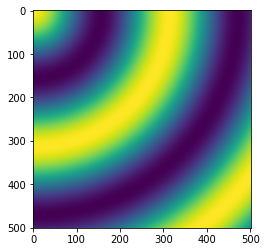

This is the original image


In [64]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("circular.txt")   #loads data I want to compress

plt.imshow(data)
plt.show()

print("This is the original image")

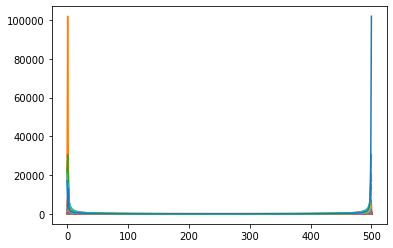

In [3]:
DFT = np.fft.fft2(data) #performs Fourier transformation
plt.plot(np.abs(DFT))   #to get the coefficients for the plot
plt.show()

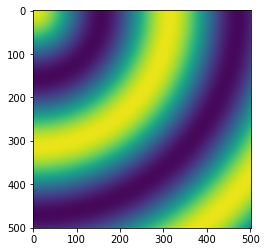

This looks very similar to the original image
We have removed 86.22595129103071 % of the data


In [66]:
'''
Now we can see from the plot above that there are many values
that are very close to zero that we can eliminate to compress
the file size.
'''

c1 = np.copy(DFT)         #copy the array
remove1 = np.abs(c1)<10   #remove coefficients less than 10
c1[remove1] = 0       #sets all coefficients less than 10 to zero

#This will retrieve the compressed image
compressed1 = np.fft.ifft2(c1).real 
plt.imshow(compressed1)
plt.show()
print("This looks very similar to the original image")

#Calculate total remaining data
total = len(DFT) * len(DFT)  #Squared because 2D array
remaining1 = np.count_nonzero(remove1)
removed1 = (remaining1/total) *100
print("We have removed", str(removed1), '% of the data')

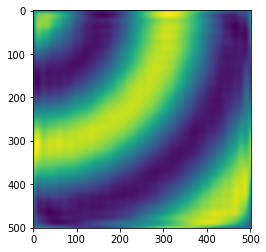

This looks more blurry but still not bad
We have removed 99.88326739734104 % of the data


In [67]:
'''
maybe if we remove more small coefficients then we can get the file
size smaller
'''

c2 = np.copy(DFT)           #copy the array
remove2 = np.abs(c2)<1000   #remove coefficients less than 10
c2[remove2] = 0    #sets all coefficeients less than 1000 to zero

#this will retrieve the compressed image
compressed2 = np.fft.ifft2(c2).real
plt.imshow(compressed2)
plt.show()
print("This looks more blurry but still not bad")

remaining2 = np.count_nonzero(remove2)
removed2 = (remaining2/total) *100
print("We have removed", str(np.abs(removed2)), '% of the data')

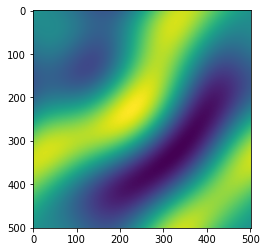

This is too much
We have removed 99.99561754734046 % of the data


In [68]:
'''
lets see if we can make it even smaller
'''

c3 = np.copy(DFT)           #copy the array
remove3 = np.abs(c3)<20000   #remove coefficients less than 10
c3[remove3] = 0    #sets all coefficeients less than 10000 to zero

#this will retrieve the compressed image
compressed3 = np.fft.ifft2(c3).real
plt.imshow(compressed3)
plt.show()
print("This is too much")

remaining3 = np.count_nonzero(remove3)
removed3 = (remaining3/total) *100
print("We have removed", str(np.abs(removed3)), "% of the data")

In [ ]:
'''
So we can see that the Fourier tranformation allows us to see
the data with the highest magnitude and remove the lowest magnitude
data so that way we can compress the data.
'''